In [2]:
import pandas as pd

# Dosyayı okuyalım ve içeriğine bakalım
file_path = "filtered.csv"
data = pd.read_csv(file_path)

# İlk birkaç satırı inceleyelim
data.head()

C:\Users\tolgakilinckaya\AppData\Local\Temp\ipykernel_26044\2186883946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Date         Time  Latitude  Longitude  Depth  Magnitude  \
0  2023.10.20  20:53:08.67   38.3393    27.2000   13.3        4.1   
1  2023.10.18  12:55:24.74   38.1968    27.6873   10.3        4.3   
2  2023.10.09  22:57:59.48   37.7927    26.9352   10.7        3.8   
3  2023.10.07  09:10:01.14   38.0210    27.1077    5.0        3.5   
4  2023.10.01  13:30:16.87   38.3602    27.2092    7.1        4.0   

                 Timestamp  Time_Diff  
0  2023-10-20 20:53:08.670     -493.0  
1  2023-10-18 12:55:24.740     -931.0  
2  2023-10-09 22:57:59.480    -2519.0  
3  2023-10-07 09:10:01.140      -47.0  
4  2023-10-01 13:30:16.870     -127.0

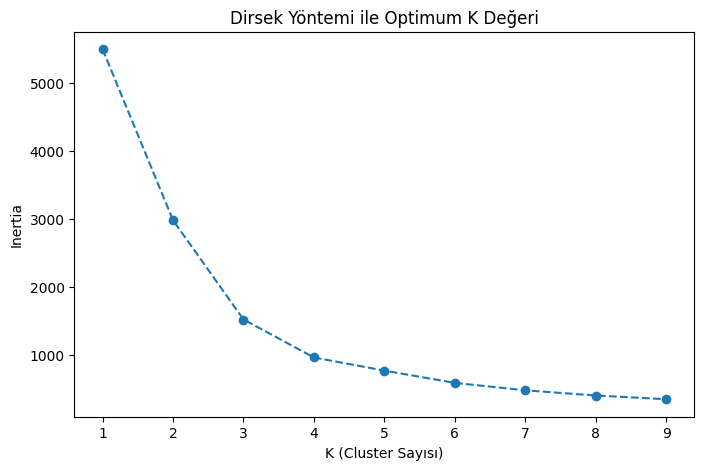

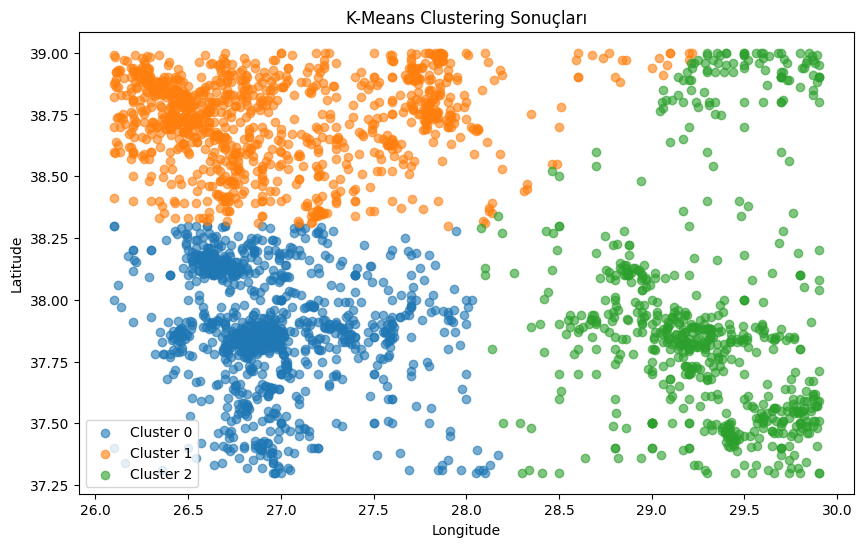

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Veriyi yükleme
data = pd.read_csv("filtered.csv")

# Clustering için kullanılacak sütunları seçme
clustering_data = data[["Latitude", "Longitude"]]

# Veriyi normalize etme
scaler = StandardScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data)

# Dirsek yöntemiyle uygun k değerini bulma
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_data_normalized)
    inertia.append(kmeans.inertia_)

# Dirsek grafiği
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("K (Cluster Sayısı)")
plt.ylabel("Inertia")
plt.title("Dirsek Yöntemi ile Optimum K Değeri")
plt.show()

# K = 3 ile K-Means uygulama
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(clustering_data_normalized)

# Clustering sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}', alpha=0.6)

plt.title("K-Means Clustering Sonuçları")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [4]:
import folium
from folium.plugins import MarkerCluster

# Harita merkezini belirlemek için ortalama koordinatları hesaplayalım
center_lat = data["Latitude"].mean()
center_lon = data["Longitude"].mean()

# Folium haritasını oluştur
map_clusters = folium.Map(location=[center_lat, center_lon], zoom_start=7)

# Renk seçenekleri
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'lightgreen']

# Her küme için noktaları ekle
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    cluster_group = MarkerCluster().add_to(map_clusters)
    for _, row in cluster_data.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Cluster: {cluster}, Magnitude: {row['Magnitude']}",
            icon=folium.Icon(color=colors[cluster % len(colors)])
        ).add_to(cluster_group)

# Haritayı göster
map_clusters


In [5]:
# Magnitude değeri 4 üstü olan depremleri filtreleyerek yeni bir DataFrame oluştur
high_magnitude_earthquakes = data[data['Magnitude'] > 4]

# Yeni DataFrame'i kontrol edelim
high_magnitude_earthquakes.head()


Date         Time  Latitude  Longitude  Depth  Magnitude  \
0   2023.10.20  20:53:08.67   38.3393    27.2000   13.3        4.1   
1   2023.10.18  12:55:24.74   38.1968    27.6873   10.3        4.3   
5   2023.09.04  05:26:08.10   37.9662    27.1258    8.2        4.4   
11  2023.07.20  23:49:14.28   37.7382    27.1395   13.4        4.2   
17  2023.06.11  04:42:00.70   37.7535    27.1320   13.6        4.3   

                  Timestamp  Time_Diff  Cluster  
0   2023-10-20 20:53:08.670     -493.0        1  
1   2023-10-18 12:55:24.740     -931.0        0  
5   2023-09-04 05:26:08.100     -437.0        0  
11  2023-07-20 23:49:14.280     -695.0        0  
17  2023-06-11 04:42:00.700       -6.0        0

C:\Users\tolgakilinckaya\AppData\Local\Temp\ipykernel_26044\4024881274.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_magnitude_earthquakes['Cluster'] = kmeans.fit_predict(clustering_data_normalized)


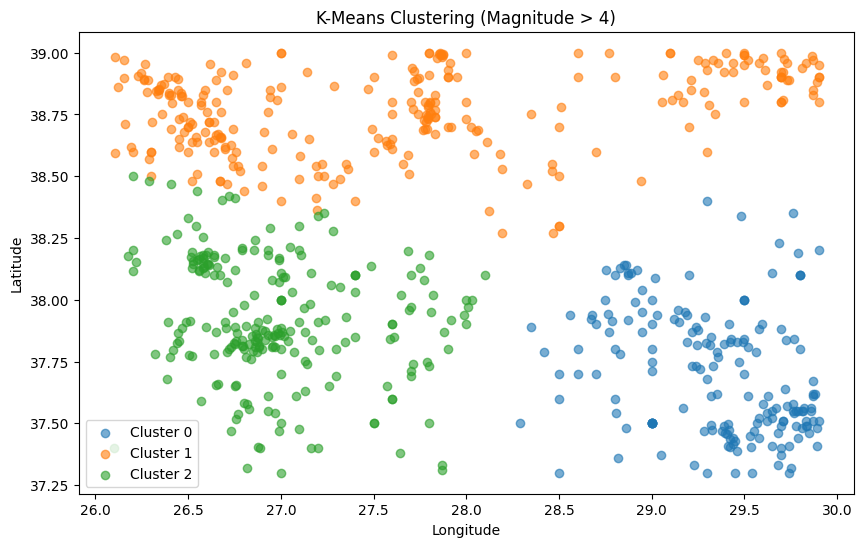

In [6]:
# Sadece Latitude ve Longitude için clustering uygulayın
clustering_data = high_magnitude_earthquakes[["Latitude", "Longitude"]]

# Veriyi normalize edin
scaler = StandardScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data)

# K-Means uygulayın (k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
high_magnitude_earthquakes['Cluster'] = kmeans.fit_predict(clustering_data_normalized)

# Clustering sonuçlarını görselleştirin
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = high_magnitude_earthquakes[high_magnitude_earthquakes['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}', alpha=0.6)

plt.title("K-Means Clustering (Magnitude > 4)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

C:\Users\tolgakilinckaya\AppData\Local\Temp\ipykernel_26044\86805282.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.fit_predict(clustering_data_normalized)


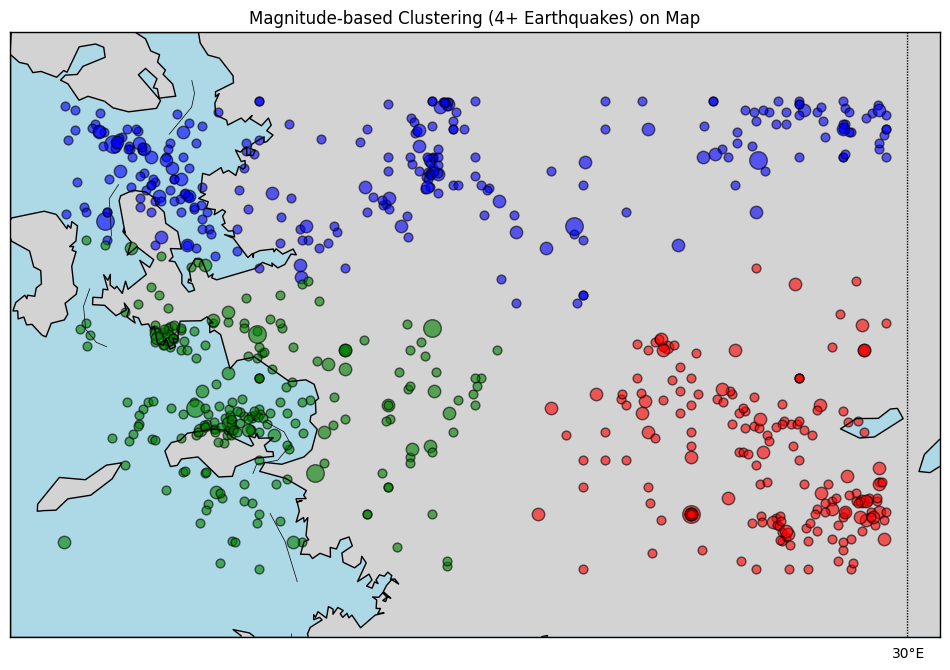

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 4 üstü depremleri filtreleyin
filtered_data = data[data['Magnitude'] > 4]

# Clustering için Latitude ve Longitude sütunlarını alın
clustering_data = filtered_data[["Latitude", "Longitude"]]
scaler = StandardScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data)

# K-Means uygulayın (k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
filtered_data['Cluster'] = kmeans.fit_predict(clustering_data_normalized)

# Basemap haritası oluşturun
plt.figure(figsize=(12, 8))
m = Basemap(projection="merc", 
            llcrnrlat=filtered_data["Latitude"].min() - 0.25,
            urcrnrlat=filtered_data["Latitude"].max() + 0.25,
            llcrnrlon=filtered_data["Longitude"].min() - 0.25,
            urcrnrlon=filtered_data["Longitude"].max() + 0.25,
            resolution="i")

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color="lightblue")
m.fillcontinents(color="lightgray", lake_color="lightblue")
m.drawparallels(range(-90, 91, 10), labels=[1, 0, 0, 0])
m.drawmeridians(range(-180, 181, 10), labels=[0, 0, 0, 1])

# Cluster noktalarını ve büyüklüklerine göre boyutlarını haritaya ekleyin
colors = ['red', 'blue', 'green', 'purple', 'orange']
for cluster in range(k):
    cluster_data = filtered_data[filtered_data['Cluster'] == cluster]
    for _, row in cluster_data.iterrows():
        x, y = m(row["Longitude"], row["Latitude"])
        # Nokta büyüklüğünü ayarla
        if 4 <= row['Magnitude'] < 5:
            size = 40  # Küçük noktalar
        elif 5 <= row['Magnitude'] < 6:
            size = 80  # Orta büyüklükte noktalar
        else:
            size = 160  # Büyük noktalar
        m.scatter(x, y, c=colors[cluster % len(colors)], s=size, alpha=0.6, edgecolor='k')

plt.title("Magnitude-based Clustering (4+ Earthquakes) on Map")
plt.show()


In [8]:
cluster_stats = data.groupby('Cluster').agg(
    Average_Depth=('Depth', 'mean'),
    Average_Magnitude=('Magnitude', 'mean'),
    Earthquake_Count=('Magnitude', 'count'),
    Count_4_to_4_9=('Magnitude', lambda x: ((x >= 4) & (x < 5)).sum()),
    Count_5_to_5_9=('Magnitude', lambda x: ((x >= 5) & (x < 6)).sum()),
    Count_6_Plus=('Magnitude', lambda x: (x >= 6).sum())
).reset_index()
# 0 - red, 1 - blue, 2 - green
# Küme istatistiklerini görüntüleme
cluster_stats

Cluster  Average_Depth  Average_Magnitude  Earthquake_Count  \
0        0       9.592507           3.860903              1041   
1        1      11.132663           3.865134              1044   
2        2      12.763142           4.022508               662   

   Count_4_to_4_9  Count_5_to_5_9  Count_6_Plus  
0             266              25             4  
1             244              36             3  
2             209              47             2

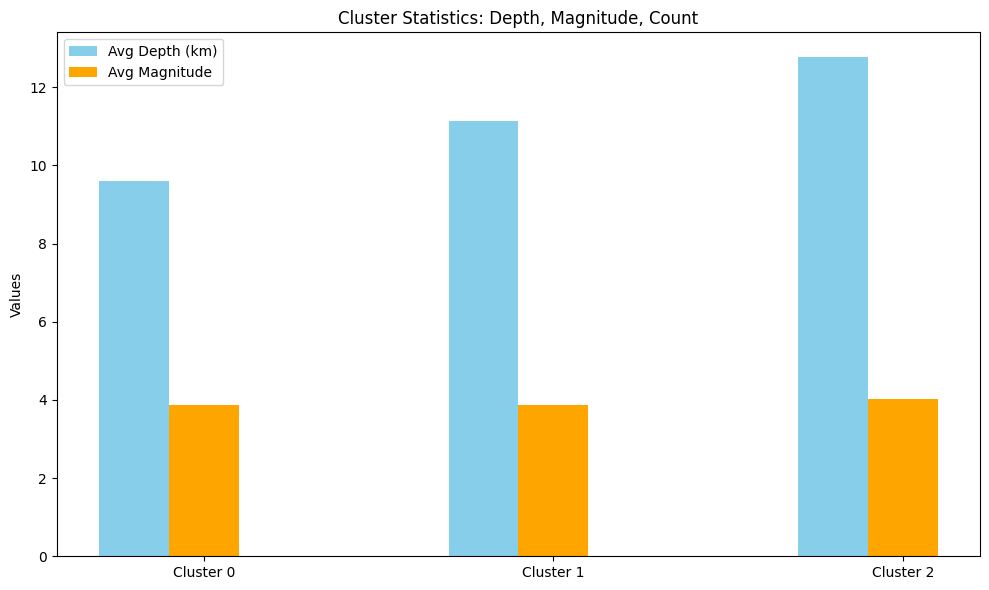

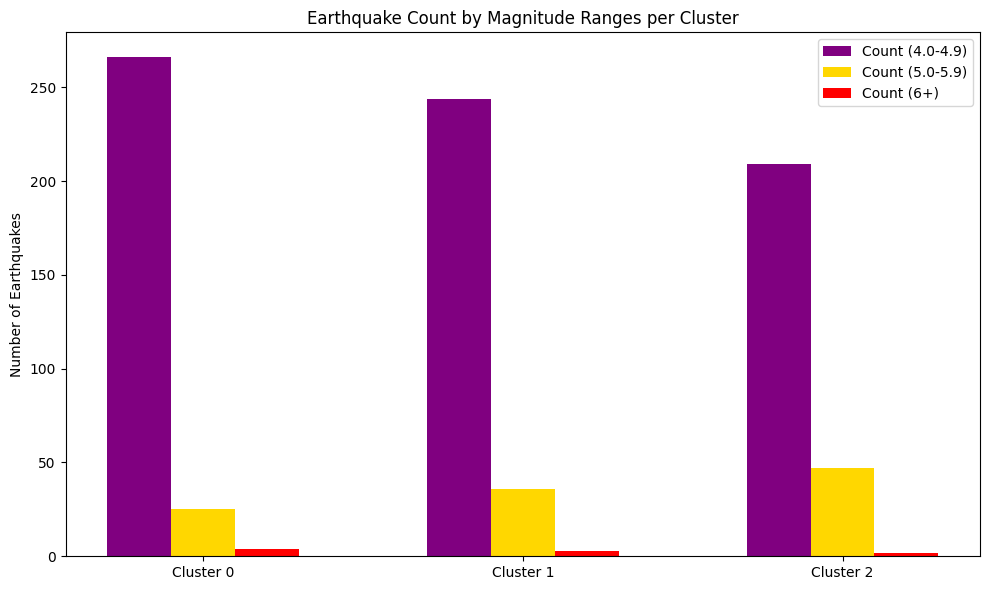

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Görselleştirme: Her kümenin istatistikleri
if 'Cluster' in data.columns:
    # Küme sayısını ve diğer bilgileri al
    clusters = cluster_stats['Cluster']
    avg_depth = cluster_stats['Average_Depth']
    avg_magnitude = cluster_stats['Average_Magnitude']
    counts = cluster_stats['Earthquake_Count']
    count_6_plus = cluster_stats['Count_6_Plus']
    count_5_to_5_9 = cluster_stats['Count_5_to_5_9']
    count_4_to_4_9 = cluster_stats['Count_4_to_4_9']

    # Bar grafikleri için ayarlar
    x = np.arange(len(clusters))
    bar_width = 0.2

    # Ortalama Derinlik ve Büyüklük Grafiği
    plt.figure(figsize=(10, 6))
    plt.bar(x - bar_width, avg_depth, bar_width, label='Avg Depth (km)', color='skyblue')
    plt.bar(x, avg_magnitude, bar_width, label='Avg Magnitude', color='orange')
    plt.xticks(x, [f'Cluster {int(c)}' for c in clusters])
    plt.ylabel('Values')
    plt.title('Cluster Statistics: Depth, Magnitude, Count')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Deprem Sayıları (4+, 5+, 6+) Grafiği
    plt.figure(figsize=(10, 6))
    plt.bar(x - bar_width, count_4_to_4_9, bar_width, label='Count (4.0-4.9)', color='purple')
    plt.bar(x, count_5_to_5_9, bar_width, label='Count (5.0-5.9)', color='gold')
    plt.bar(x + bar_width, count_6_plus, bar_width, label='Count (6+)', color='red')
    plt.xticks(x, [f'Cluster {int(c)}' for c in clusters])
    plt.ylabel('Number of Earthquakes')
    plt.title('Earthquake Count by Magnitude Ranges per Cluster')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Cluster bilgisi mevcut değil. Lütfen tekrar kümeleme yapın.")


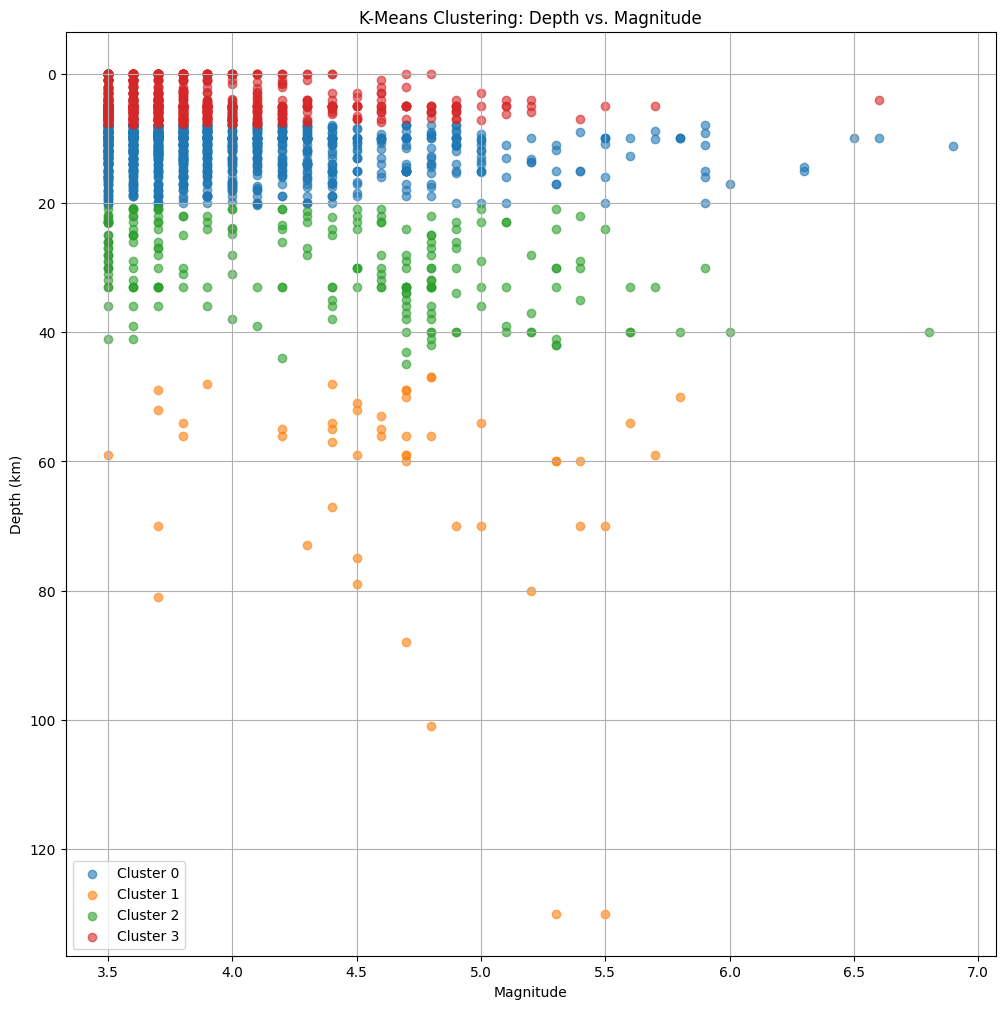

In [13]:
# Derinlik ve büyüklüğe göre clustering için veriyi hazırlayın
clustering_data_depth = data[['Depth']].dropna()

# Veriyi normalize edin
scaler = StandardScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data_depth)

# K-Means uygulayın (örneğin k=4)
k = 4
kmeans_depth = KMeans(n_clusters=k, random_state=42, n_init=10)
data['Cluster'] = kmeans_depth.fit_predict(clustering_data_normalized)

# Her küme için ortalama değerleri hesaplayın
cluster_stats_depth = data.groupby('Cluster').agg(
    Average_Depth=('Depth', 'mean'),
    Average_Magnitude=('Magnitude', 'mean'),
    Earthquake_Count=('Magnitude', 'count')
).reset_index()

# Sonuçları görselleştirme
plt.figure(figsize=(12, 12))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Magnitude'], cluster_data['Depth'], label=f'Cluster {cluster}', alpha=0.6)

plt.gca().invert_yaxis()  # Derinlik görselde ters gösterilir (yüzeye yakın olan üstte)
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.title('K-Means Clustering: Depth vs. Magnitude')
plt.legend()
plt.grid()
plt.show()

In [11]:
# Her küme için istatistiki değerleri hesaplayalım
cluster_stats_depth = data.groupby('Cluster').agg(
    Average_Depth=('Depth', 'mean'),
    Min_Depth=('Depth', 'min'),
    Max_Depth=('Depth', 'max'),
    Average_Magnitude=('Magnitude', 'mean'),
    Min_Magnitude=('Magnitude', 'min'),
    Max_Magnitude=('Magnitude', 'max'),
    Earthquake_Count=('Magnitude', 'count')
).reset_index()

# İstatistikleri yazdır
print(cluster_stats_depth)


   Cluster  Average_Depth  Min_Depth  Max_Depth  Average_Magnitude  \
0        0      11.581487        7.9       20.5           3.902573   
1        1      63.040000       47.0      130.0           4.650000   
2        2      29.541706       20.8       45.0           4.327014   
3        3       4.111960        0.0        7.8           3.782981   

   Min_Magnitude  Max_Magnitude  Earthquake_Count  
0            3.5            6.9              1399  
1            3.5            5.8                50  
2            3.5            6.8               211  
3            3.5            6.6              1087  
